In [1]:
import numpy as np
from scipy.integrate import odeint
from pylab import *


def Spring(s):
    return -(s + s**2 + s**3)

def derivs(var,t):
    N = len(var)//2
    
    x = var[:N]
    v = var[N:]
    
    d = np.zeros(2*N)
    d[:N] = v
    
    for i in range(N):
        
        d[i+N] =  Spring(x[i] - (x[(i+1)%N])) - Spring(x[i-1] - x[i])
    
    return d

In [2]:
def RK4(f,init,t):

    N = len(t)
    Nvar = len(init)
    
    h = t[1]-t[0]

    r = np.zeros([N,Nvar])
    r[0,:] = init

    for i in range(N-1):
        k1 = h*f(r[i,:],t[i])
        k2 = h*f(r[i,:]+k1/2,t[i]+h/2)
        k3 = h*f(r[i,:]+k2/2,t[i]+h/2)
        k4 = h*f(r[i,:]+k3,t[i]+h)
        r[i+1,:] = r[i,:] + (k1+2*k2+2*k3+k4)/6.0

    return r

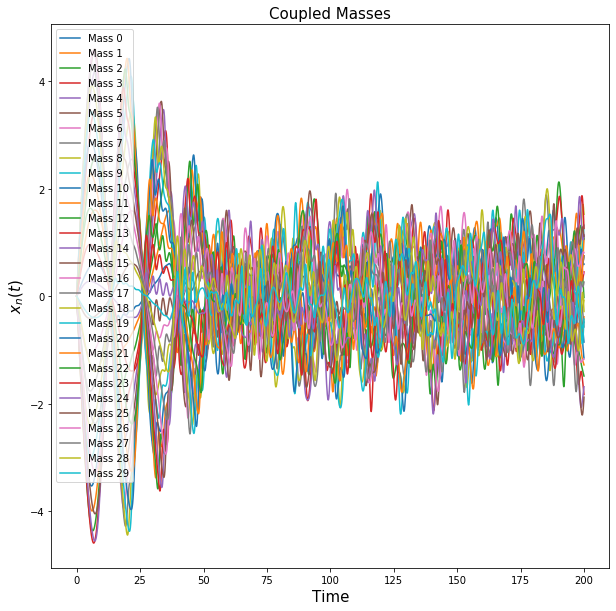

In [5]:
t = np.linspace(0,200,10000)
N = 30
init = np.zeros(2*N)

for i in range(N):
    init[i+N] = np.sin(2*pi*(i+0.6)/N)

Coupled = RK4(derivs, init, t)

fig1 = plt.figure(figsize=(10,10));
plt.title('Coupled Masses', fontsize=15)
plt.xlabel('Time', fontsize = 15)
plt.ylabel('$x_n(t)$', fontsize = 15)

for i in range(N):
    plot(t, Coupled[:,i], label='Mass ' + str(i))
plt.legend()

